# Example 2
Intente resolver un problema de optimización numérica usando Simulated Annealing y un Algoritmo Evolutivo. La función a minimizar es la llamada Rastrigin y su defnición es:

a) Proponga una representación adecuada para las soluciones al problema cuando N=10, sabiendo que el rango de las variables va de -5 a 5 y se requiere trabajar al menos con 2 dígitos decimales de precisión.

b) Proponga una función de evaluación que le permita calificar que tan buena es una solución.

c) Para Simulated Annealing defina como y cuantas soluciones vecinas se van a generar en cada paso de la búsqueda mientras que para el Algoritmo Evolutivo de na que operadores van a usarse durante el proceso evolutivo.

d) Implemente y pruebe lo de nido en los puntos anteriores. Evalúe los resultados obtenidos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import mpld3

%matplotlib inline
mpld3.enable_notebook()

from utils.busqueda_local import hill_climb
from utils.busqueda_local import simulated_annealing
from deap import base, creator, tools, algorithms

In [3]:
# -*- coding: utf-8 -*-
"""
Example 2: Optimización numérica
"""
from math import cos, pi

# Esta es la función Rastrigin
def rastrigin(vect):
    total = 0
    for x in vect:
        total += x ** 2 - 10 * cos(2 * pi * x)
    return (10 * len(vect)) + total

# Simulated Annealing
## Nuevos

In [4]:
def nuevos():
    minimo = -5
    maximo = 5
    N = 10
    x = []
    for i in range(N):
        x.append(round(minimo + np.random.random() * (maximo - minimo), 2))
    return x

## Evaluacion

In [5]:
def evaluacion(x):
    return rastrigin(x)

## Vecinos

In [6]:
def vecinos(x):
    v = []
    d = -0.03
    minimo = -5
    maximo = 5
    for i in range(4):
        pos = np.random.randint(0,9)
        n = x[pos] + d
        if n >= minimo and n <= maximo:
            x[pos] = n
        d += 0.02
        v.append(x)
    return v

## Defino Temperaturas

In [7]:
# Probabilidad prob de elejir soluciones peores con diferencia mayor a dif al inicio
dif  = 0.5
prob = 0.01
T_max = -dif / np.log(prob)
# Probabilidad prob de elejir soluciones peores con diferencia mayor a dif al final
dif  = 0.01
prob = 0.01
T_min = -dif / np.log(prob)
# Factor de reduccion de acuerdo a las iteraciones deseadas
N = 30
reduccion = np.exp(np.log(T_min / T_max) / N)

## Busco

In [8]:
def buscar(i):
    mejor = nuevos()
    e=0
    for j in range(i):
        mejor, evaluaciones = simulated_annealing(mejor, evaluacion, vecinos,
                                          T_max=T_max, 
                                          T_min=T_min, 
                                          reduccion=reduccion)
        e+=evaluaciones
    print("Cantidad de soluciones evaluadas:", e)
    print("Valor de func para esa solución:", evaluacion(mejor))
    return

In [9]:
buscar(5)

('Cantidad de soluciones evaluadas:', 625)
('Valor de func para esa soluci\xc3\xb3n:', 179.3418044946892)


# Algoritmo Evolutivo

## Defino Fitness Esperado

In [10]:
creator.create("FitnessMax", base.Fitness, weights=(-9999,))
creator.create("Individual", list, fitness=creator.FitnessMax)

## Defino ADN del Individuo

In [11]:
def gen():
    return round(-5 + np.random.random() * (5 - -5), 2)

In [12]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, gen, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [13]:
ind = toolbox.individual()
ind

[-4.75, 0.31, -2.19, -0.34, -3.44, -3.2, 1.41, -4.9, -2.09, 3.78]

## Defino Evaluacion, Seleccion y Mutacion

In [14]:
def evaluarADN(x):
        return [rastrigin(x)]

In [15]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.20)
toolbox.register("select", tools.selTournament, tournsize=3)

In [16]:
def main():    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min    	max    
0  	50    	177.685	62.0088	265.049
1  	32    	149.953	93.022 	189.766
2  	28    	127.824	66.2133	166.781
3  	35    	104.105	60.5377	156.731
4  	23    	82.1042	22.1905	121.888
5  	26    	55.8144	15.5679	93.022 
6  	38    	41.0292	13.4263	74.8389
7  	34    	29.4849	8.64642	61.9949
8  	31    	21.144 	6.94584	43.1804
9  	30    	14.327 	1.31577	24.3459
10 	35    	8.95334	0      	22.1161
11 	35    	5.46152	0      	11.0874
12 	37    	3.15503	0      	9.64642
13 	28    	1.45959	0      	4      
14 	22    	0.917884	0      	4      
15 	34    	0.578938	0      	3.31577
16 	24    	0.268415	0      	3      
17 	25    	0.278946	0      	3      
18 	26    	0.62    	0      	5      
19 	43    	0.46    	0      	4      
20 	30    	0.46    	0      	5      
21 	26    	0.3     	0      	3      
22 	25    	0.66    	0      	5      
23 	36    	0.76    	0      	4      
24 	26    	0.52    	0      	4      
25 	26    	0.6     	0      	5      
26 	25    	0.38    	0      	4      
27 	25 

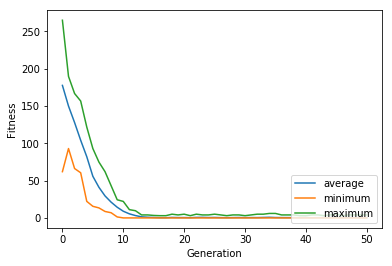

In [17]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")